In [1]:
import pandas as pd
import numpy as np

In [2]:
class LinearRegressor():
    def __init__(self, lr, epochs):
        self.__W = None
        self.__losses = []
        self.__lr = lr
        self.__epochs = epochs

    def _predict(self,X):
        return np.dot(X,self.__W)
    def predict(self,X):
        X = np.hstack([np.ones((len(X),1)),X])
        return self._predict(X)

    def _computeLoss(self, y, y_hat):
        return 1/(len(y)*2) * np.square(y_hat - y)

    def _computeGradient(self, X, y, y_hat):
        return 1/len(y) * np.dot(X.T,(y_hat-y))

    def _updateWeight(self, gradient):
        return self.__W - (self.__lr * gradient)

    def fit(self,X,y):
        self.__W = np.array([0] * (X.shape[1]+1))
        X = np.hstack([np.ones((len(X),1)),X])
        for epoch in range(self.__epochs):
            y_hat = self._predict(X)
            loss = self._computeLoss(y,y_hat)
            gradient = self._computeGradient(X,y,y_hat)
            self.__W = self._updateWeight(gradient)
            self.__losses.append(np.mean(loss))

    def parameters(self):
        return self.__W

    def losses(self):
        return self.__losses

# 1.Load dataset

In [3]:
df = pd.read_csv('Advertising.csv')
df = df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# 2. Import libraries

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Normalize and split dataset into training and test set

In [5]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]

## 3.1 Normalize

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 3.2 Split dataset

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42,test_size=0.3)

# 4. Linear regression model

Text(0, 0.5, 'MSE')

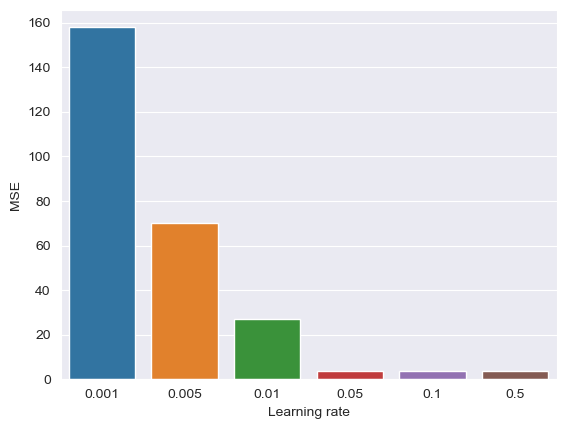

In [8]:
learning_rates = [0.001,0.005,0.01,0.05,0.1,0.5]
epochs = 100
mses = []
for lr in learning_rates:
    reg = LinearRegressor(lr=lr,epochs=epochs)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_val)
    mse = mean_squared_error(y_val,y_pred)
    mses.append(mse)
sns.barplot(x=learning_rates,y=mses)
plt.xlabel('Learning rate')
plt.ylabel('MSE')